<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/16_MNIST_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf



Using TensorFlow backend.


### seed 값 설정


In [0]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)



### 데이터 불러오기



In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)



11493376/11490434 [==============================] - 1s 0us/step


### 컨볼루션 신경망의 설정


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



### 모델 최적화 설정


In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)



### 모델의 실행


In [6]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])




Epoch 00001: val_loss improved from inf to 0.05499, saving model to ./model/01-0.0550.hdf5

Epoch 00002: val_loss improved from 0.05499 to 0.04048, saving model to ./model/02-0.0405.hdf5

Epoch 00003: val_loss improved from 0.04048 to 0.03251, saving model to ./model/03-0.0325.hdf5

Epoch 00004: val_loss did not improve from 0.03251

Epoch 00005: val_loss improved from 0.03251 to 0.03181, saving model to ./model/05-0.0318.hdf5

Epoch 00006: val_loss improved from 0.03181 to 0.02793, saving model to ./model/06-0.0279.hdf5

Epoch 00007: val_loss improved from 0.02793 to 0.02728, saving model to ./model/07-0.0273.hdf5

Epoch 00008: val_loss did not improve from 0.02728

Epoch 00009: val_loss improved from 0.02728 to 0.02423, saving model to ./model/09-0.0242.hdf5

Epoch 00010: val_loss did not improve from 0.02423

Epoch 00011: val_loss did not improve from 0.02423

Epoch 00012: val_loss improved from 0.02423 to 0.02323, saving model to ./model/12-0.0232.hdf5

Epoch 00013: val_loss did n

### 테스트 정확도 출력


In [7]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



10000/10000 [==============================] - 1s 65us/step

 Test Accuracy: 0.9932


### 테스트 셋의 오차


In [0]:
y_vloss = history.history['val_loss']



### 학습셋의 오차


In [0]:
y_loss = history.history['loss']



### 그래프로 표현


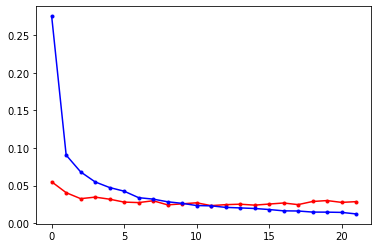

In [10]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')



### 그래프에 그리드를 주고 레이블을 표시


No handles with labels found to put in legend.


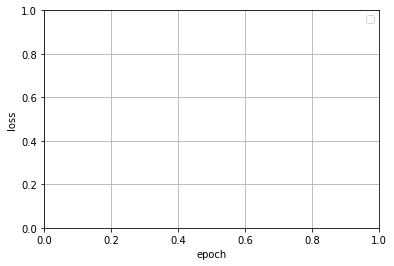

In [11]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
